In [124]:
import math 
import pandas_datareader as pdr
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import datetime as dt
from datetime import datetime, timedelta
import yfinance as yf
import mplfinance as mpf
from matplotlib.dates import YearLocator, DateFormatter
import ta 
from sklearn.linear_model import LinearRegression

In [2]:
### Risk and Return Financial Analysis
##Google Dataset from Yahoo
data=yf.download('GOOG', start ='2014-01-01', end='2023-04-22')

[*********************100%***********************]  1 of 1 completed


In [74]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,27.782366,27.839401,27.603037,27.724083,27.724083,73129082
2014-01-03,27.770908,27.818977,27.520098,27.521841,27.521841,66917888
2014-01-06,27.721344,27.867046,27.557707,27.828691,27.828691,71037271
2014-01-07,28.019974,28.385853,27.924334,28.365179,28.365179,102486711
2014-01-08,28.543015,28.575891,28.226450,28.424210,28.424210,90036218
...,...,...,...,...,...,...
2023-04-17,105.430000,106.709999,105.320000,106.419998,106.419998,29043400
2023-04-18,107.000000,107.050003,104.779999,105.120003,105.120003,17641400
2023-04-19,104.214996,105.724998,103.800003,105.019997,105.019997,16732000


In [5]:
data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.to_numpy()

array([[2.77823658e+01, 2.78394012e+01, 2.76030369e+01, 2.77240829e+01,
        2.77240829e+01, 7.31290820e+07],
       [2.77709084e+01, 2.78189774e+01, 2.75200977e+01, 2.75218410e+01,
        2.75218410e+01, 6.69178880e+07],
       [2.77213440e+01, 2.78670464e+01, 2.75577068e+01, 2.78286915e+01,
        2.78286915e+01, 7.10372710e+07],
       ...,
       [1.04214996e+02, 1.05724998e+02, 1.03800003e+02, 1.05019997e+02,
        1.05019997e+02, 1.67320000e+07],
       [1.04650002e+02, 1.06888000e+02, 1.04639999e+02, 1.05900002e+02,
        1.05900002e+02, 2.25153000e+07],
       [1.06089996e+02, 1.06639999e+02, 1.05489998e+02, 1.05910004e+02,
        1.05910004e+02, 2.13415750e+07]])

In [8]:
arr=data.to_numpy()


In [9]:
arr.shape

(2342, 6)

In [10]:
len(data)

2342

In [11]:
arr[0]

array([2.77823658e+01, 2.78394012e+01, 2.76030369e+01, 2.77240829e+01,
       2.77240829e+01, 7.31290820e+07])

In [12]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,27.782366,27.839401,27.603037,27.724083,27.724083,73129082
2014-01-03,27.770908,27.818977,27.520098,27.521841,27.521841,66917888
2014-01-06,27.721344,27.867046,27.557707,27.828691,27.828691,71037271
2014-01-07,28.019974,28.385853,27.924334,28.365179,28.365179,102486711
2014-01-08,28.543015,28.575891,28.226450,28.424210,28.424210,90036218


In [13]:
arr.dtype

dtype('float64')

In [15]:
small=arr[:10,0].copy()
small

array([27.7823658 , 27.77090836, 27.72134399, 28.01997375, 28.54301453,
       28.47925377, 28.37066078, 28.05658722, 28.34251595, 28.71711159])

In [16]:
np.max(small)

28.717111587524414

In [17]:
small.max()

28.717111587524414

In [18]:
small.argmax()

9

In [19]:
small

array([27.7823658 , 27.77090836, 27.72134399, 28.01997375, 28.54301453,
       28.47925377, 28.37066078, 28.05658722, 28.34251595, 28.71711159])

In [20]:
np.log(small)

array([3.3244015 , 3.32398901, 3.32220266, 3.3329176 , 3.35141223,
       3.34917588, 3.34535554, 3.33422344, 3.34436301, 3.35749317])

In [21]:
np.log(data)
##Here we have the log values of the original values 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.324401,3.326452,3.317926,3.322301,3.322301,18.107737
2014-01-03,3.323989,3.325718,3.314917,3.314980,3.314980,18.018977
2014-01-06,3.322203,3.327445,3.316282,3.326068,3.326068,18.078715
2014-01-07,3.332918,3.345891,3.329498,3.345162,3.345162,18.445244
2014-01-08,3.351412,3.352563,3.340259,3.347241,3.347241,18.315723
...,...,...,...,...,...,...
2023-04-17,4.658047,4.670115,4.657003,4.667394,4.667394,17.184302
2023-04-18,4.672829,4.673296,4.651863,4.655103,4.655103,16.685759
2023-04-19,4.646456,4.660841,4.642466,4.654151,4.654151,16.632834


In [ ]:
data/data.shift( )

In [22]:
np.log(data/data.shift()) 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,-0.000412,-0.000734,-0.003009,-0.007322,-0.007322,-0.088760
2014-01-06,-0.001786,0.001726,0.001366,0.011088,0.011088,0.059738
2014-01-07,0.010715,0.018446,0.013216,0.019095,0.019095,0.366528
2014-01-08,0.018495,0.006673,0.010761,0.002079,0.002079,-0.129521
...,...,...,...,...,...,...
2023-04-17,-0.021210,-0.026540,-0.021324,-0.028166,-0.028166,0.336467
2023-04-18,0.014782,0.003181,-0.005140,-0.012291,-0.012291,-0.498543
2023-04-19,-0.026373,-0.012455,-0.009397,-0.000952,-0.000952,-0.052925


In [23]:
np.sum(np.log(data/data.shift()))


Open         1.339886
High         1.343006
Low          1.340690
Close        1.340288
Adj Close    1.340288
Volume      -1.231569
dtype: float64

In [2]:

####Analysis portfolio 
from pandas_datareader import data as pdr
yf.pdr_override()
data=pdr.get_data_yahoo(["AAPL", "MSFT", "IBM", "GOOG"],start="2021-01-01", end="2023-04-21")

[*********************100%***********************]  4 of 4 completed


In [66]:
data.head()

Adj Close                                          Close  \
                  AAPL       GOOG         IBM        MSFT        AAPL   
Date                                                                    
2021-01-04  127.679993  86.412003  106.178665  213.342010  129.410004   
2021-01-05  129.258621  87.045998  108.063400  213.547821  131.009995   
2021-01-06  124.907562  86.764503  110.761986  208.010666  126.599998   
2021-01-07  129.169815  89.362503  110.504974  213.930023  130.919998   
2021-01-08  130.284729  90.360497  110.110893  215.233459  132.050003   

                                                     High             ...  \
                 GOOG         IBM        MSFT        AAPL       GOOG  ...   
Date                                                                  ...   
2021-01-04  86.412003  118.489487  217.690002  133.610001  88.032501  ...   
2021-01-05  87.045998  120.592735  217.899994  131.740005  87.383499  ...   
2021-01-06  86.764503  123.604210  212.250000  131.050003  87.400002  ...   
2021-01-07  89.362503  123.317398  218.289993  131.630005  89.419998  ...   
2021-01-08  90.360497  122.877632  219.619995  132.630005  90.491997  ...   

                   Low                    Open                         \
                   IBM        MSFT        AAPL       GOOG         IBM   
Date                                                                    
2021-01-04  117.629066  214.809998  133.520004  87.876999  120.315491   
2021-01-05  119.130020  215.699997  128.889999  86.250000  119.512428   
2021-01-06  121.147224  211.940002  127.720001  85.131500  121.319313   
2021-01-07  122.619499  213.710007  128.360001  87.002998  124.321220   
2021-01-08  121.395790  217.029999  132.429993  89.399002  122.915871   

                           Volume                               
                  MSFT       AAPL      GOOG      IBM      MSFT  
Date                                                            
2021-01-04  222.529999  143301900  38038000  5417443  37130100  
2021-01-05  217.259995   97664900  22906000  6395872  23823000  
2021-01-06  212.169998  155088000  52042000  8322708  35930700  
2021-01-07  214.039993  109578200  45300000  4714740  27694500  
2021-01-08  218.679993  105158200  41012000  4891305  22956200  

[5 rows x 24 columns]

In [3]:
data=data['Adj Close']

In [68]:
data

,AAPL,GOOG,IBM,MSFT
Date,,,,
2021-01-04,127.679993,86.412003,106.178665,213.342010
2021-01-05,129.258621,87.045998,108.063400,213.547821
2021-01-06,124.907562,86.764503,110.761986,208.010666
2021-01-07,129.169815,89.362503,110.504974,213.930023
2021-01-08,130.284729,90.360497,110.110893,215.233459
...,...,...,...,...
2023-04-14,165.210007,109.459999,128.139999,286.140015
2023-04-17,165.229996,106.419998,127.820000,288.799988
2023-04-18,166.470001,105.120003,127.779999,288.369995


In [4]:
portfolios=[.25, .15, .40, .20]
##Percentages values for AAPL, GOOG,IBM AND MSFT

In [5]:
np.sum(portfolios)

1.0

In [64]:
data/data.iloc[0]

,AAPL,GOOG,IBM,MSFT
Date,,,,
2021-01-04,1.000000,1.000000,1.000000,1.000000
2021-01-05,1.012364,1.007337,1.017750,1.000965
2021-01-06,0.978286,1.004079,1.043166,0.975010
2021-01-07,1.011668,1.034145,1.040745,1.002756
2021-01-08,1.020400,1.045694,1.037034,1.008866
...,...,...,...,...
2023-04-14,1.293938,1.266722,1.206834,1.341227
2023-04-17,1.294094,1.231542,1.203820,1.353695
2023-04-18,1.303806,1.216498,1.203443,1.351679


In [67]:
##Portfolio insights 
(data/data.iloc[0])*portfolios*100000
##Investment: 25.000 in AAPL, 15.000 IN GOOGLE, 40.000 IN IBM and 20.000 IN MSFT


,AAPL,GOOG,IBM,MSFT
Date,,,,
2021-01-04,25000.000000,15000.000000,40000.000000,20000.000000
2021-01-05,25309.091126,15110.053298,40710.018236,20019.291092
2021-01-06,24457.148150,15061.189575,41726.638783,19500.205377
2021-01-07,25291.702706,15512.168518,41629.816547,20055.122514
2021-01-08,25510.005064,15685.407207,41481.359808,20177.314686
...,...,...,...,...
2023-04-14,32348.446619,19000.832495,48273.347565,26824.533388
2023-04-17,32352.360508,18473.127866,48152.796163,27073.895710
2023-04-18,32595.156040,18247.465565,48137.726879,27033.585539


In [72]:
weight=np.random.random(4)
weight/=weight.sum()
weight

array([0.00768007, 0.36249153, 0.2131275 , 0.4167009 ])

In [70]:
weight.sum()

1.0

In [ ]:
##VOLATILITY AND RETURN(Google data)

In [ ]:
### Risk and Return 
data=yf.download('GOOG', start ='2014-01-01', end='2023-04-22')

In [75]:
##volatility and Average True Range(ATR)
##The more volatile a stock is the more risk we get. As a result there is  more return or potential return

high_low =data['High']-data['Low']


In [76]:
high_low

Date
2014-01-02    0.236364
2014-01-03    0.298880
2014-01-06    0.309340
2014-01-07    0.461519
2014-01-08    0.349442
                ...   
2023-04-17    1.389999
2023-04-18    2.270004
2023-04-19    1.924995
2023-04-20    2.248001
2023-04-21    1.150002
Length: 2342, dtype: float64

In [79]:
##Shift function(shift function takes the previous value of the close column;thus, we get previous close values)
high_cp=np.abs(data['High']-data['Close'].shift())
low_cp=np.abs(data['Low']-data['Close'].shift())

In [78]:
high_cp


Date
2014-01-02         NaN
2014-01-03    0.094894
2014-01-06    0.345205
2014-01-07    0.557161
2014-01-08    0.210712
                ...   
2023-04-17    2.750000
2023-04-18    0.630005
2023-04-19    0.604996
2023-04-20    1.868004
2023-04-21    0.739998
Length: 2342, dtype: float64

In [81]:
low_cp

Date
2014-01-02         NaN
2014-01-03    0.203985
2014-01-06    0.035866
2014-01-07    0.095642
2014-01-08    0.138729
                ...   
2023-04-17    4.139999
2023-04-18    1.639999
2023-04-19    1.320000
2023-04-20    0.379997
2023-04-21    0.410004
Length: 2342, dtype: float64

In [96]:

concatenated_df = pd.concat([high_low, high_cp, low_cp], axis=1)

In [98]:
concatenated_df

,0,1,2
Date,,,
2014-01-02,0.236364,NaN,NaN
2014-01-03,0.298880,0.094894,0.203985
2014-01-06,0.309340,0.345205,0.035866
2014-01-07,0.461519,0.557161,0.095642
2014-01-08,0.349442,0.210712,0.138729
...,...,...,...
2023-04-17,1.389999,2.750000,4.139999
2023-04-18,2.270004,0.630005,1.639999
2023-04-19,1.924995,0.604996,1.320000


In [99]:
true_range=np.max(concatenated_df, axis=1)

 

In [100]:
###The Average True Range (ATR) is a technical analysis indicator that measures the volatility of an asset by taking into account the range of price movements over a specified period of time.
average_true_range=true_range.rolling(14).mean()
average_true_range

Date
2014-01-02         NaN
2014-01-03         NaN
2014-01-06         NaN
2014-01-07         NaN
2014-01-08         NaN
                ...   
2023-04-17    2.671786
2023-04-18    2.635358
2023-04-19    2.645000
2023-04-20    2.690572
2023-04-21    2.567715
Length: 2342, dtype: float64

Text(0, 0.5, 'Price')

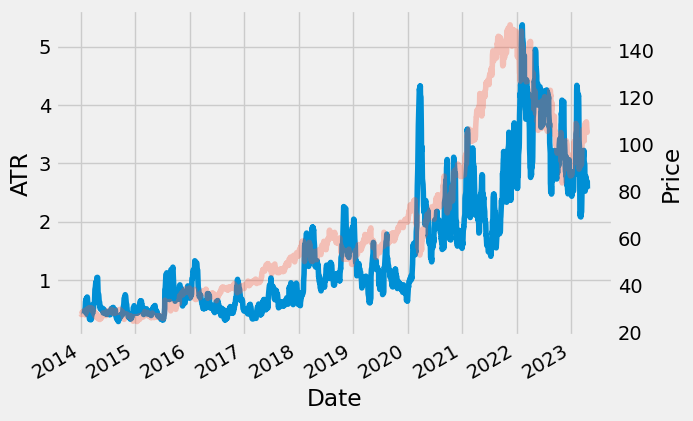

In [110]:
fig,ax =plt.subplots()
average_true_range.plot(ax=ax)
ax2=data['Close'].plot(ax=ax,secondary_y=True, alpha=0.3)
ax.set_ylabel("ATR")
ax2.set_ylabel("Price")

##We can see that high lines represent volatile values
##Graph: Average True Range and Price. 

In [4]:
##ATR using SMA

# Calculate the true range for each period
high_cp = abs(data['High'] - data['Close'].shift())
low_cp = abs(data['Low'] - data['Close'].shift())
true_range = pd.concat([data['High'] - data['Low'], high_cp, low_cp], axis=1).max(axis=1)

# Calculate the ATR using a simple moving average with a 10-day time period
atr_period = 10
data['ATR'] = true_range.rolling(window=atr_period).sum() / atr_period

# Drop any rows with missing ATR values
##data = data.dropna()

# Print the DataFrame with ATR values
data

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-01-02   27.782366   27.839401   27.603037   27.724083   27.724083   
2014-01-03   27.770908   27.818977   27.520098   27.521841   27.521841   
2014-01-06   27.721344   27.867046   27.557707   27.828691   27.828691   
2014-01-07   28.019974   28.385853   27.924334   28.365179   28.365179   
2014-01-08   28.543015   28.575891   28.226450   28.424210   28.424210   
...                ...         ...         ...         ...         ...   
2023-04-17  105.430000  106.709999  105.320000  106.419998  106.419998   
2023-04-18  107.000000  107.050003  104.779999  105.120003  105.120003   
2023-04-19  104.214996  105.724998  103.800003  105.019997  105.019997   
2023-04-20  104.650002  106.888000  104.639999  105.900002  105.900002   
2023-04-21  106.089996  106.639999  105.485001  105.910004  105.910004   

               Volume       ATR  
Dat

In [3]:
##ATR using EMA 

# Calculate the true range values using the previous close price
high_cp = abs(data['High'] - data['Close'].shift())
low_cp = abs(data['Low'] - data['Close'].shift())
true_range = pd.concat([data['High'] - data['Low'], high_cp, low_cp], axis=1).max(axis=1)

# Calculate the ATR using a 14-day time period
atr_period = 14

data['ATR'] = true_range.ewm(span=atr_period, adjust=False).mean()

# Print the DataFrame with ATR values
print(data)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-01-02   27.782366   27.839401   27.603037   27.724083   27.724083   
2014-01-03   27.770908   27.818977   27.520098   27.521841   27.521841   
2014-01-06   27.721344   27.867046   27.557707   27.828691   27.828691   
2014-01-07   28.019974   28.385853   27.924334   28.365179   28.365179   
2014-01-08   28.543015   28.575891   28.226450   28.424210   28.424210   
...                ...         ...         ...         ...         ...   
2023-04-17  105.430000  106.709999  105.320000  106.419998  106.419998   
2023-04-18  107.000000  107.050003  104.779999  105.120003  105.120003   
2023-04-19  104.214996  105.724998  103.800003  105.019997  105.019997   
2023-04-20  104.650002  106.888000  104.639999  105.900002  105.900002   
2023-04-21  106.089996  106.639999  105.485001  105.910004  105.910004   

               Volume       ATR  
Dat

In [10]:
#####Combining risk(volatility) and  the return 
##SHARPE RATIO
###portfolios 
from pandas_datareader import data as pdr
yf.pdr_override()
df=pdr.get_data_yahoo(["AAPL", "MSFT", "IBM", "META"],start="2021-01-01", end="2023-04-21")




[*********************100%***********************]  4 of 4 completed


In [11]:
df

Adj Close                                           Close  \
                  AAPL         IBM        META        MSFT        AAPL   
Date                                                                     
2021-01-04  127.680000  106.178665  268.940002  213.342026  129.410004   
2021-01-05  129.258606  108.063393  270.970001  213.547821  131.009995   
2021-01-06  124.907555  110.761993  263.309998  208.010666  126.599998   
2021-01-07  129.169800  110.504974  268.739990  213.930023  130.919998   
2021-01-08  130.284714  110.110893  267.570007  215.233444  132.050003   
...                ...         ...         ...         ...         ...   
2023-04-14  165.210007  128.139999  221.490005  286.140015  165.210007   
2023-04-17  165.229996  127.820000  218.860001  288.799988  165.229996   
2023-04-18  166.470001  127.779999  217.889999  288.369995  166.470001   
2023-04-19  167.630005  126.320000  215.699997  288.450012  167.630005   
2023-04-20  166.649994  126.360001  213.070007  286.109985  166.649994   

                                                      High              ...  \
                   IBM        META        MSFT        AAPL         IBM  ...   
Date                                                                    ...   
2021-01-04  118.489487  268.940002  217.690002  133.610001  120.382408  ...   
2021-01-05  120.592735  270.970001  217.899994  131.740005  121.108986  ...   
2021-01-06  123.604210  263.309998  212.250000  131.050003  126.080307  ...   
2021-01-07  123.317398  268.739990  218.289993  131.630005  124.722755  ...   
2021-01-08  122.877632  267.570007  219.619995  132.630005  123.632889  ...   
...                ...         ...         ...         ...         ...  ...   
2023-04-14  128.139999  221.490005  286.140015  166.320007  129.839996  ...   
2023-04-17  127.820000  218.860001  288.799988  165.389999  128.720001  ...   
2023-04-18  127.779999  217.889999  288.369995  167.410004  128.679993  ...   
2023-04-19  126.320000  215.699997  288.450012  168.160004  126.980003  ...   
2023-04-20  126.360001  213.070007  286.109985  167.869995  130.979996  ...   

                   Low                    Open                          \
                  META        MSFT        AAPL         IBM        META   
Date                                                                     
2021-01-04  265.200012  214.809998  133.520004  120.315491  274.779999   
2021-01-05  268.209991  215.699997  128.889999  119.512428  268.290009   
2021-01-06  260.010010  211.940002  127.720001  121.319313  262.000000   
2021-01-07  264.779999  213.710007  128.360001  124.321220  265.899994   
2021-01-08  263.179993  217.029999  132.429993  122.915871  268.309998   
...                ...         ...         ...         ...         ...   
2023-04-14  217.550003  283.690002  164.589996  128.460007  217.880005   
2023-04-17  217.130005  286.160004  165.089996  128.300003  219.789993   
2023-04-18  216.210007  287.010010  166.100006  128.139999  219.910004   
2023-04-19  212.929993  284.540009  165.800003  126.500000  213.470001   
2023-04-20  212.770004  285.079987  166.089996  130.149994  213.479996   

                           Volume                               
                  MSFT       AAPL      IBM      META      MSFT  
Date                                                            
2021-01-04  222.529999  143301900  5417443  15106100  37130100  
2021-01-05  217.259995   97664900  6395872   9871600  23823000  
2021-01-06  212.169998  155088000  8322708  24354100  35930700  
2021-01-07  214.039993  109578200  4714740  15789800  27694500  
2021-01-08  218.679993  105158200  4891305  18528300  22956200  
...                ...        ...      ...       ...       ...  
2023-04-14  287.000000   49337200  4180100  21574200  20973900  
2023-04-17  289.929993   41516200  3662700  15481900  23836200  
2023-04-18  291.570007   49923000  3193800  12281000  20161800  
2023-04-19  285.989990   47720200  7014400  15898100

In [12]:
##Adjusted close column
df=df['Adj Close']

In [13]:
df

,AAPL,IBM,META,MSFT
Date,,,,
2021-01-04,127.680000,106.178665,268.940002,213.342026
2021-01-05,129.258606,108.063393,270.970001,213.547821
2021-01-06,124.907555,110.761993,263.309998,208.010666
2021-01-07,129.169800,110.504974,268.739990,213.930023
2021-01-08,130.284714,110.110893,267.570007,215.233444
...,...,...,...,...
2023-04-14,165.210007,128.139999,221.490005,286.140015
2023-04-17,165.229996,127.820000,218.860001,288.799988
2023-04-18,166.470001,127.779999,217.889999,288.369995


In [14]:
##portfolio percentage given to each company

portfolios=[.25, .15, .40, .20]




In [15]:
np.sum(portfolios)

1.0

In [16]:

np.sum(np.log(df/df.shift()), axis=1)

Date
2021-01-04    0.000000
2021-01-05    0.038367
2021-01-06   -0.064523
2021-01-07    0.079703
2021-01-08    0.006733
                ...   
2023-04-14   -0.007929
2023-04-17   -0.005072
2023-04-18    0.001232
2023-04-19   -0.014372
2023-04-20   -0.025960
Length: 578, dtype: float64

In [17]:
np.log(df/df.shift())*portfolios

,AAPL,IBM,META,MSFT
Date,,,,
2021-01-04,NaN,NaN,NaN,NaN
2021-01-05,0.003072,0.002639,0.003008,0.000193
2021-01-06,-0.008560,0.003700,-0.011470,-0.005254
2021-01-07,0.008388,-0.000348,0.008165,0.005612
2021-01-08,0.002149,-0.000536,-0.001745,0.001215
...,...,...,...,...
2023-04-14,-0.000529,0.000281,0.002064,-0.002570
2023-04-17,0.000030,-0.000375,-0.004778,0.001851
2023-04-18,0.001869,-0.000047,-0.001777,-0.000298


In [18]:
np.sum(np.log(df/df.shift())*portfolios, axis=1)

Date
2021-01-04    0.000000
2021-01-05    0.008912
2021-01-06   -0.021585
2021-01-07    0.021817
2021-01-08    0.001082
                ...   
2023-04-14   -0.000753
2023-04-17   -0.003272
2023-04-18   -0.000253
2023-04-19   -0.003973
2023-04-20   -0.007955
Length: 578, dtype: float64

In [19]:
##Log return of our portfolio
log_return=np.sum(np.log(df/df.shift())*portfolios, axis=1)

<AxesSubplot: >

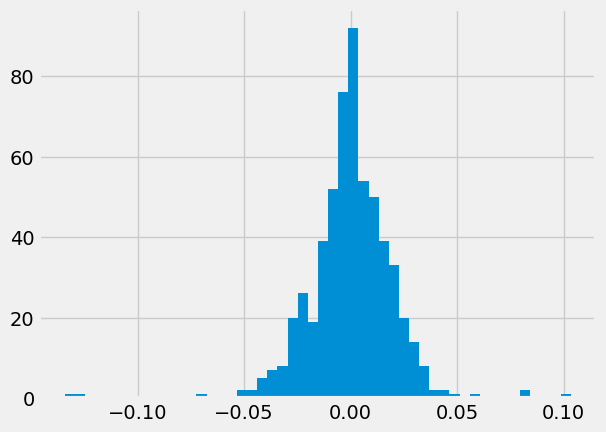

In [20]:
fig,ax =plt.subplots()
log_return.hist(bins=50, ax=ax)

In [21]:
##Standard deviation
log_return.std()

0.019466503507195625

In [22]:
log_return.mean()
##this is the average return per day

0.00010076617149569055

In [23]:
##daily average return
###Sharpe Ratio = (Expected Return - Risk-Free Rate) / Standard Deviation of Return
sharpe_ratio=log_return.mean()/log_return.std()

In [24]:
sharpe_ratio

0.005176387811937732

In [32]:
asr= sharpe_ratio*252**.5### taking square root 
asr

0.08217260904007813

In [34]:
##Comparing with other portfolios
weight=np.random.random(4)
weight/=weight.sum()
weight

array([0.13113216, 0.14749393, 0.36217892, 0.35919499])

In [35]:
log_return2=np.sum(np.log(df/df.shift())*weight, axis=1)

In [36]:
sharpe_ratio2=log_return2.mean()/log_return2.std()

In [37]:
asr2=sharpe_ratio2*252**.5
##We have 252 trading days per year

In [38]:
asr2

0.11845256875016266

In [ ]:
####asr2 gives us higher values. We obtain better results combining risk and return together.

In [ ]:
#MONTECARLO SIMULATION  

In [61]:
##MONTECARLO SIMULATION WITH PORTFOLIOS AND SHARPE RATIO
from pandas_datareader import data as pdr
yf.pdr_override()
montecarlo=pdr.get_data_yahoo(["AAPL", "MSFT", "IBM", "META"],start="2021-01-01", end="2023-04-21")

[*********************100%***********************]  4 of 4 completed


In [62]:
montecarlo

Adj Close                                           Close  \
                  AAPL         IBM        META        MSFT        AAPL   
Date                                                                     
2021-01-04  127.680016  106.178665  268.940002  213.341995  129.410004   
2021-01-05  129.258606  108.063393  270.970001  213.547806  131.009995   
2021-01-06  124.907562  110.761986  263.309998  208.010666  126.599998   
2021-01-07  129.169815  110.504974  268.739990  213.930008  130.919998   
2021-01-08  130.284714  110.110901  267.570007  215.233444  132.050003   
...                ...         ...         ...         ...         ...   
2023-04-14  165.210007  128.139999  221.490005  286.140015  165.210007   
2023-04-17  165.229996  127.820000  218.860001  288.799988  165.229996   
2023-04-18  166.470001  127.779999  217.889999  288.369995  166.470001   
2023-04-19  167.630005  126.320000  215.699997  288.450012  167.630005   
2023-04-20  166.649994  126.360001  213.070007  286.109985  166.649994   

                                                      High              ...  \
                   IBM        META        MSFT        AAPL         IBM  ...   
Date                                                                    ...   
2021-01-04  118.489487  268.940002  217.690002  133.610001  120.382408  ...   
2021-01-05  120.592735  270.970001  217.899994  131.740005  121.108986  ...   
2021-01-06  123.604210  263.309998  212.250000  131.050003  126.080307  ...   
2021-01-07  123.317398  268.739990  218.289993  131.630005  124.722755  ...   
2021-01-08  122.877632  267.570007  219.619995  132.630005  123.632889  ...   
...                ...         ...         ...         ...         ...  ...   
2023-04-14  128.139999  221.490005  286.140015  166.320007  129.839996  ...   
2023-04-17  127.820000  218.860001  288.799988  165.389999  128.720001  ...   
2023-04-18  127.779999  217.889999  288.369995  167.410004  128.679993  ...   
2023-04-19  126.320000  215.699997  288.450012  168.160004  126.980003  ...   
2023-04-20  126.360001  213.070007  286.109985  167.869995  130.979996  ...   

                   Low                    Open                          \
                  META        MSFT        AAPL         IBM        META   
Date                                                                     
2021-01-04  265.200012  214.809998  133.520004  120.315491  274.779999   
2021-01-05  268.209991  215.699997  128.889999  119.512428  268.290009   
2021-01-06  260.010010  211.940002  127.720001  121.319313  262.000000   
2021-01-07  264.779999  213.710007  128.360001  124.321220  265.899994   
2021-01-08  263.179993  217.029999  132.429993  122.915871  268.309998   
...                ...         ...         ...         ...         ...   
2023-04-14  217.550003  283.690002  164.589996  128.460007  217.880005   
2023-04-17  217.130005  286.160004  165.089996  128.300003  219.789993   
2023-04-18  216.210007  287.010010  166.100006  128.139999  219.910004   
2023-04-19  212.929993  284.540009  165.800003  126.500000  213.470001   
2023-04-20  212.770004  285.079987  166.089996  130.149994  213.479996   

                           Volume                               
                  MSFT       AAPL      IBM      META      MSFT  
Date                                                            
2021-01-04  222.529999  143301900  5417443  15106100  37130100  
2021-01-05  217.259995   97664900  6395872   9871600  23823000  
2021-01-06  212.169998  155088000  8322708  24354100  35930700  
2021-01-07  214.039993  109578200  4714740  15789800  27694500  
2021-01-08  218.679993  105158200  4891305  18528300  22956200  
...                ...        ...      ...       ...       ...  
2023-04-14  287.000000   49337200  4180100  21574200  20973900  
2023-04-17  289.929993   41516200  3662700  15481900  23836200  
2023-04-18  291.570007   49923000  3193800  12281000  20161800  
2023-04-19  285.989990   47720200  7014400  15898100

In [ ]:
##What is the right balance for the stocks ?


In [63]:
montecarlo=montecarlo['Adj Close']

In [64]:
montecarlo

,AAPL,IBM,META,MSFT
Date,,,,
2021-01-04,127.680016,106.178665,268.940002,213.341995
2021-01-05,129.258606,108.063393,270.970001,213.547806
2021-01-06,124.907562,110.761986,263.309998,208.010666
2021-01-07,129.169815,110.504974,268.739990,213.930008
2021-01-08,130.284714,110.110901,267.570007,215.233444
...,...,...,...,...
2023-04-14,165.210007,128.139999,221.490005,286.140015
2023-04-17,165.229996,127.820000,218.860001,288.799988
2023-04-18,166.470001,127.779999,217.889999,288.369995


In [65]:
log_returns=np.log(montecarlo/montecarlo.shift())

In [66]:
log_returns

,AAPL,IBM,META,MSFT
Date,,,,
2021-01-04,NaN,NaN,NaN,NaN
2021-01-05,0.012288,0.017595,0.007520,0.000964
2021-01-06,-0.034241,0.024666,-0.028676,-0.026271
2021-01-07,0.033554,-0.002323,0.020412,0.028060
2021-01-08,0.008594,-0.003572,-0.004363,0.006074
...,...,...,...,...
2023-04-14,-0.002116,0.001875,0.005160,-0.012848
2023-04-17,0.000121,-0.002500,-0.011945,0.009253
2023-04-18,0.007477,-0.000313,-0.004442,-0.001490


In [69]:
weight=np.random.random(4)
##we need to normalize it 
weight /= weight.sum()


In [70]:
weight

array([0.43292228, 0.03733368, 0.2473414 , 0.28240263])

In [71]:
##We need to calculate the expected return 
exp_rtn = np.sum(log_returns.mean()*weight)*252

In [72]:
exp_rtn

0.0642425545735156

In [73]:
##We need also the expected volatility
exp_vol = np.sqrt(np.dot(weight,np.dot(log_returns.cov()*252,weight)))

In [76]:
sharpe_ratio = exp_rtn/ exp_vol

In [77]:
sharpe_ratio

0.21620989303388

In [ ]:
##Now we need to transform these values into a montecarlo simulation

In [80]:
n = 5000
weights= np.zeros((n,4))
exp_rtns = np.zeros(n)
exp_vols=np.zeros(n)
sharpe_ratios = np.zeros(n)

for i in range(n):
    weight=np.random.random(4)
    weight /= weight.sum()
    weights[i] = weight
    
    exp_rtns[i] = np.sum(log_returns.mean()*weight)*252
    exp_vols[i] = np.sqrt(np.dot(weight,np.dot(log_returns.cov()*252,weight)))
    sharpe_ratios[i]= exp_rtns[i] / exp_vols[i]

In [81]:
sharpe_ratios.max()
##sharpe_ratios gives a higher value than sharpe ratio
##So sharpe_ratios is > than sharpe ratio

0.4990249990614348

In [82]:
sharpe_ratios.argmax()

146

In [83]:
weights[146]

array([0.1161839 , 0.41153513, 0.00054105, 0.47173992])

Text(0, 0.5, 'Expected Return')

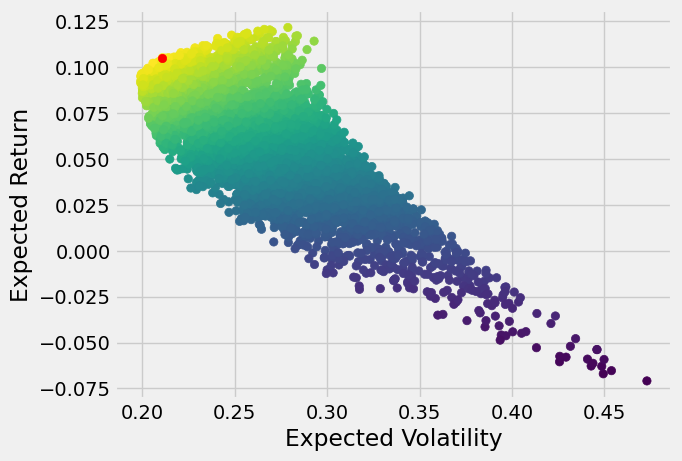

In [87]:
###visualization 
fig, ax =plt.subplots()
ax.scatter(exp_vols, exp_rtns, c=sharpe_ratios)
ax.scatter(exp_vols[sharpe_ratios.argmax()], exp_rtns[sharpe_ratios.argmax()], c='r')
ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')

In [ ]:
###CORRELATION: FINANCIAL ANALYSIS

In [94]:
from pandas_datareader import data as pdr
yf.pdr_override()
port_corr=pdr.get_data_yahoo(["AAPL", "MSFT", "IBM", "META"],start="2021-01-01", end="2023-04-21")

[*********************100%***********************]  4 of 4 completed


In [95]:
port_corr

Adj Close                                           Close  \
                  AAPL         IBM        META        MSFT        AAPL   
Date                                                                     
2021-01-04  127.680008  106.178665  268.940002  213.342010  129.410004   
2021-01-05  129.258606  108.063400  270.970001  213.547791  131.009995   
2021-01-06  124.907562  110.761971  263.309998  208.010666  126.599998   
2021-01-07  129.169815  110.504967  268.739990  213.930008  130.919998   
2021-01-08  130.284698  110.110893  267.570007  215.233475  132.050003   
...                ...         ...         ...         ...         ...   
2023-04-14  165.210007  128.139999  221.490005  286.140015  165.210007   
2023-04-17  165.229996  127.820000  218.860001  288.799988  165.229996   
2023-04-18  166.470001  127.779999  217.889999  288.369995  166.470001   
2023-04-19  167.630005  126.320000  215.699997  288.450012  167.630005   
2023-04-20  166.649994  126.360001  213.070007  286.109985  166.649994   

                                                      High              ...  \
                   IBM        META        MSFT        AAPL         IBM  ...   
Date                                                                    ...   
2021-01-04  118.489487  268.940002  217.690002  133.610001  120.382408  ...   
2021-01-05  120.592735  270.970001  217.899994  131.740005  121.108986  ...   
2021-01-06  123.604210  263.309998  212.250000  131.050003  126.080307  ...   
2021-01-07  123.317398  268.739990  218.289993  131.630005  124.722755  ...   
2021-01-08  122.877632  267.570007  219.619995  132.630005  123.632889  ...   
...                ...         ...         ...         ...         ...  ...   
2023-04-14  128.139999  221.490005  286.140015  166.320007  129.839996  ...   
2023-04-17  127.820000  218.860001  288.799988  165.389999  128.720001  ...   
2023-04-18  127.779999  217.889999  288.369995  167.410004  128.679993  ...   
2023-04-19  126.320000  215.699997  288.450012  168.160004  126.980003  ...   
2023-04-20  126.360001  213.070007  286.109985  167.869995  130.979996  ...   

                   Low                    Open                          \
                  META        MSFT        AAPL         IBM        META   
Date                                                                     
2021-01-04  265.200012  214.809998  133.520004  120.315491  274.779999   
2021-01-05  268.209991  215.699997  128.889999  119.512428  268.290009   
2021-01-06  260.010010  211.940002  127.720001  121.319313  262.000000   
2021-01-07  264.779999  213.710007  128.360001  124.321220  265.899994   
2021-01-08  263.179993  217.029999  132.429993  122.915871  268.309998   
...                ...         ...         ...         ...         ...   
2023-04-14  217.550003  283.690002  164.589996  128.460007  217.880005   
2023-04-17  217.130005  286.160004  165.089996  128.300003  219.789993   
2023-04-18  216.210007  287.010010  166.100006  128.139999  219.910004   
2023-04-19  212.929993  284.540009  165.800003  126.500000  213.470001   
2023-04-20  212.770004  285.079987  166.089996  130.149994  213.479996   

                           Volume                               
                  MSFT       AAPL      IBM      META      MSFT  
Date                                                            
2021-01-04  222.529999  143301900  5417443  15106100  37130100  
2021-01-05  217.259995   97664900  6395872   9871600  23823000  
2021-01-06  212.169998  155088000  8322708  24354100  35930700  
2021-01-07  214.039993  109578200  4714740  15789800  27694500  
2021-01-08  218.679993  105158200  4891305  18528300  22956200  
...                ...        ...      ...       ...       ...  
2023-04-14  287.000000   49337200  4180100  21574200  20973900  
2023-04-17  289.929993   41516200  3662700  15481900  23836200  
2023-04-18  291.570007   49923000  3193800  12281000  20161800  
2023-04-19  285.989990   47720200  7014400  15898100

In [96]:
port_corr=port_corr['Adj Close']

In [97]:
##Normalizing data. We do this by using the log return 
log_r=np.log(port_corr/port_corr.shift())

In [98]:
log_r

,AAPL,IBM,META,MSFT
Date,,,,
2021-01-04,NaN,NaN,NaN,NaN
2021-01-05,0.012288,0.017595,0.007520,0.000964
2021-01-06,-0.034241,0.024665,-0.028676,-0.026271
2021-01-07,0.033554,-0.002323,0.020412,0.028060
2021-01-08,0.008594,-0.003572,-0.004363,0.006074
...,...,...,...,...
2023-04-14,-0.002116,0.001875,0.005160,-0.012848
2023-04-17,0.000121,-0.002500,-0.011945,0.009253
2023-04-18,0.007477,-0.000313,-0.004442,-0.001490


In [99]:
log_r.corr()


,AAPL,IBM,META,MSFT
AAPL,1.000000,0.304685,0.546801,0.757769
IBM,0.304685,1.000000,0.129532,0.242463
META,0.546801,0.129532,1.000000,0.582062
MSFT,0.757769,0.242463,0.582062,1.000000


In [102]:
import yfinance as yf 
sp500=yf.download('^GSPC', start ='2020-01-01', end='2023-04-21')

[*********************100%***********************]  1 of 1 completed


In [ ]:
sp500.head()

In [106]:
log_r['sp500'] =np.log(sp500['Adj Close']/sp500['Adj Close'].shift())

In [108]:
log_r.head()

,AAPL,IBM,META,MSFT,sp500
Date,,,,,
2021-01-04,NaN,NaN,NaN,NaN,-0.014865
2021-01-05,0.012288,0.017595,0.007520,0.000964,0.007058
2021-01-06,-0.034241,0.024665,-0.028676,-0.026271,0.005694
2021-01-07,0.033554,-0.002323,0.020412,0.028060,0.014738
2021-01-08,0.008594,-0.003572,-0.004363,0.006074,0.005477


In [109]:
log_r.corr()
##We can see that Microsoft and Apple have a high correlation with the sp500. This  can be good and bad.
##If everything has a high correlation with the sp500 then if the sp500 goes down all goes down. 


,AAPL,IBM,META,MSFT,sp500
AAPL,1.000000,0.304685,0.546801,0.757769,0.820689
IBM,0.304685,1.000000,0.129532,0.242463,0.437602
META,0.546801,0.129532,1.000000,0.582062,0.613402
MSFT,0.757769,0.242463,0.582062,1.000000,0.819102
sp500,0.820689,0.437602,0.613402,0.819102,1.000000


In [112]:
start=dt.datetime(2020,1,1)
def test_correlation(ticker): 
    df =pdr.get_data_yahoo(ticker,start)
    lr = log_r.copy()
    lr[ticker]= np.log(df['Adj Close']/df['Adj Close'].shift())
    return lr.corr()

In [114]:
test_correlation('TLT')

[*********************100%***********************]  1 of 1 completed


,AAPL,IBM,META,MSFT,sp500,TLT
AAPL,1.000000,0.304685,0.546801,0.757769,0.820689,0.053512
IBM,0.304685,1.000000,0.129532,0.242463,0.437602,-0.085119
META,0.546801,0.129532,1.000000,0.582062,0.613402,0.035797
MSFT,0.757769,0.242463,0.582062,1.000000,0.819102,0.100308
sp500,0.820689,0.437602,0.613402,0.819102,1.000000,0.021099
TLT,0.053512,-0.085119,0.035797,0.100308,0.021099,1.000000


In [117]:
def visualize_correlation(ticker1,ticker2): 
    df=pdr.get_data_yahoo([ticker1, ticker2], start)
    df=df['Adj Close']
    df=df/df.iloc[0]
    fig, ax =plt.subplots()
    df.plot(ax=ax)


[*********************100%***********************]  2 of 2 completed


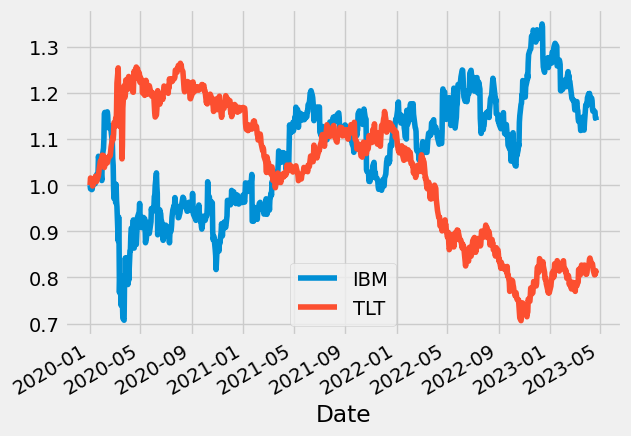

In [118]:
visualize_correlation("IBM", "TLT")
##NEGATIVE CORRELATION 

[*********************100%***********************]  2 of 2 completed


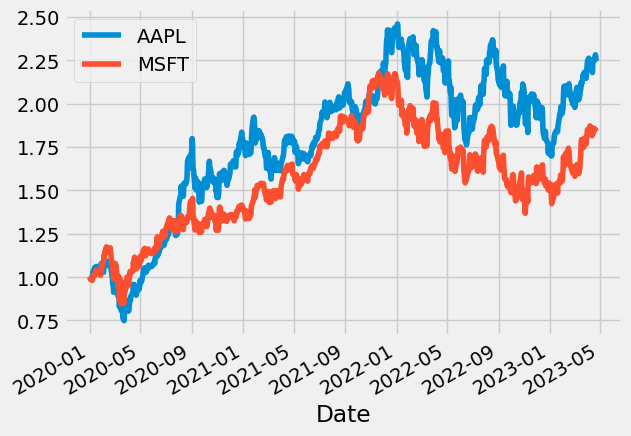

In [123]:
visualize_correlation("AAPL", "MSFT")
## POSITIVE CORRELATION

In [133]:
##LOGISTIC REGRESSION APPLIED TO FINANCIAL ANALYSIS

from pandas_datareader import data as pdr
yf.pdr_override()
logistic_r=pdr.get_data_yahoo(["KO", "NSRGY", "AMZN", "AZN", "^GSPC"],start="2019-01-01", end="2023-04-21")


[*********************100%***********************]  5 of 5 completed


In [134]:
logistic_r.head()

Adj Close                                                \
                 AMZN        AZN         KO      NSRGY        ^GSPC   
Date                                                                  
2019-01-02  76.956497  33.322468  41.098747  74.374138  2510.030029   
2019-01-03  75.014000  33.789696  40.844776  76.266663  2447.889893   
2019-01-04  78.769501  34.539009  41.659214  77.546898  2531.939941   
2019-01-07  81.475502  34.186390  41.116253  76.730515  2549.689941   
2019-01-08  82.829002  33.613388  41.580402  76.971725  2574.409912   

                Close                                                ...  \
                 AMZN        AZN         KO      NSRGY        ^GSPC  ...   
Date                                                                 ...   
2019-01-02  76.956497  37.799999  46.930000  80.169998  2510.030029  ...   
2019-01-03  75.014000  38.330002  46.639999  82.209999  2447.889893  ...   
2019-01-04  78.769501  39.180000  47.570000  83.589996  2531.939941  ...   
2019-01-07  81.475502  38.779999  46.950001  82.709999  2549.689941  ...   
2019-01-08  82.829002  38.130001  47.480000  82.970001  2574.409912  ...   

                 Open                                                \
                 AMZN        AZN         KO      NSRGY        ^GSPC   
Date                                                                  
2019-01-02  73.260002  37.720001  46.939999  80.599998  2476.959961   
2019-01-03  76.000504  38.380001  46.820000  81.949997  2491.919922   
2019-01-04  76.500000  38.820000  46.750000  82.480003  2474.330078   
2019-01-07  80.115501  39.000000  47.570000  82.769997  2535.610107   
2019-01-08  83.234497  38.380001  47.250000  83.169998  2568.110107   

               Volume                                          
                 AMZN      AZN        KO    NSRGY       ^GSPC  
Date                                                           
2019-01-02  159662000  3594000  11603700   686200  3733160000  
2019-01-03  139512000  5013500  14714400  1113500  3858830000  
2019-01-04  183652000  2854000  13013700   673200  4234140000  
2019-01-07  159864000  5738700  13135500   665900  4133120000  
2019-01-08  177628000  4697400  15420700   457700  4120060000  

[5 rows x 30 columns]

In [135]:
logistic_r=logistic_r['Adj Close']


In [136]:
logistic_r

,AMZN,AZN,KO,NSRGY,^GSPC
Date,,,,,
2019-01-02,76.956497,33.322468,41.098747,74.374138,2510.030029
2019-01-03,75.014000,33.789696,40.844776,76.266663,2447.889893
2019-01-04,78.769501,34.539009,41.659214,77.546898,2531.939941
2019-01-07,81.475502,34.186390,41.116253,76.730515,2549.689941
2019-01-08,82.829002,33.613388,41.580402,76.971725,2574.409912
...,...,...,...,...,...
2023-04-14,102.510002,73.860001,63.049999,126.099998,4137.640137
2023-04-17,102.739998,73.629997,63.459999,126.300003,4151.319824
2023-04-18,102.300003,75.019997,63.560001,126.900002,4154.870117


In [137]:
##Normmalizing data
logg_return=np.log(logistic_r/logistic_r.shift())


In [138]:
logg_return

,AMZN,AZN,KO,NSRGY,^GSPC
Date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.025566,0.013924,-0.006199,0.025128,-0.025068
2019-01-04,0.048851,0.021933,0.019744,0.016647,0.033759
2019-01-07,0.033777,-0.010262,-0.013119,-0.010583,0.006986
2019-01-08,0.016476,-0.016903,0.011225,0.003139,0.009649
...,...,...,...,...,...
2023-04-14,0.001074,-0.012245,-0.001585,0.001031,-0.002072
2023-04-17,0.002241,-0.003119,0.006482,0.001585,0.003301
2023-04-18,-0.004292,0.018702,0.001575,0.004739,0.000855


In [146]:
###convert the data 
##AMAZON AND SP500

ticker_a = 'AMZN'
ticker_b='^GSPC'

In [147]:
def linear_regression(ticker_a, ticker_b): 
    X= logg_return[ticker_a].iloc[1:].to_numpy().reshape(-1,1)##we are taking out the first row containing NAN value ``
    Y= logg_return[ticker_b].iloc[1:].to_numpy().reshape(-1,1)
    lin_regr =LinearRegression()
    lin_regr.fit(X,Y)
    Y_pred = lin_regr.predict(X)
    alpha= lin_regr.intercept_[0]
    beta= lin_regr.coef_[0,0]
    fig, ax = plt.subplots()
    ax.set_title("Alpha:" + str(round(alpha, 5)) + ", Beta:" + str(round(beta, 3)))
    ax.scatter(X, Y)
    ax.plot(X, Y_pred, c='r')

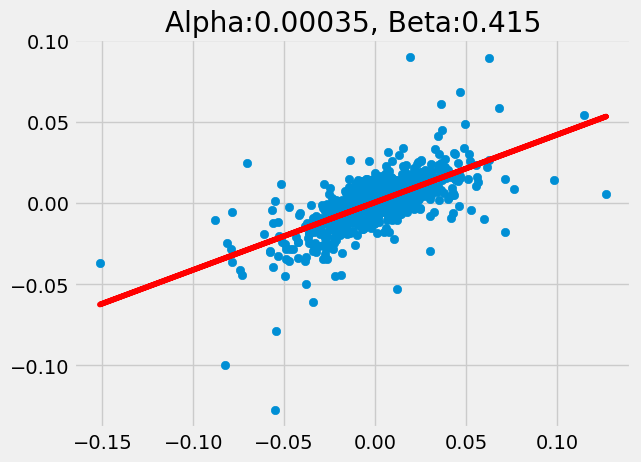

In [150]:
linear_regression("AMZN", "^GSPC")
##When amazon prices go up 1 unit then the SP500 goes up 0.415 units of percentage change 

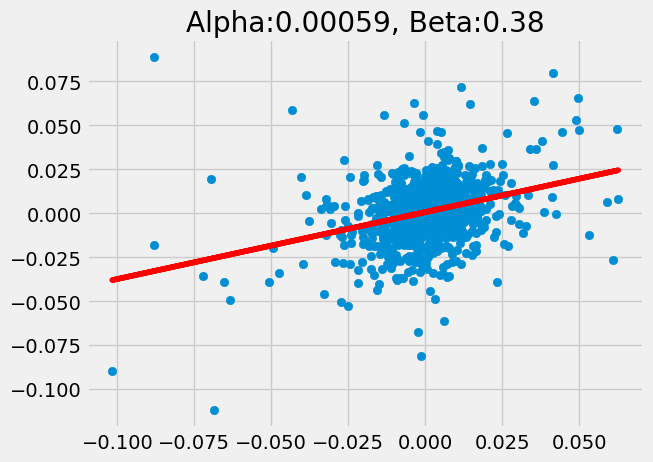

In [152]:
linear_regression("KO", "AZN")

In [ ]:
###BETA & S&P 500

In [162]:

tickers=['CHS', 'IDEXF','CRI','TSLA', '^GSPC']
start=dt.datetime(2017,12,1)
end=dt.datetime(2023,1,1)
beta=pdr.get_data_yahoo(tickers,start,end,interval='1mo')


[*********************100%***********************]  5 of 5 completed


In [166]:
beta.head(10)

Adj Close                                                 Close  \
                 CHS         CRI      IDEXF       TSLA        ^GSPC    CHS   
Date                                                                         
2017-12-01  7.350900  105.658424  30.078495  20.756666  2673.610107   8.82   
2018-01-01  8.001266  108.185463  30.884401  23.620667  2823.810059   9.51   
2018-02-01  8.447183  104.930008  26.560240  22.870667  2713.830078  10.04   
2018-03-01  7.605830   93.616844  27.565454  17.742001  2640.870117   9.04   
2018-04-01  8.435934   90.574341  27.184168  19.593332  2648.050049   9.93   
2018-05-01  7.187109   98.420151  27.284409  18.982000  2705.270020   8.46   
2018-06-01  6.915257   98.250122  30.080551  22.863333  2718.370117   8.14   
2018-07-01  7.465922   95.023163  28.629725  19.875999  2816.290039   8.70   
2018-08-01  7.826345   96.020248  26.554598  20.110666  2901.520020   9.12   
2018-09-01  7.440177   89.754173  26.765623  17.651333  2913.979980   8.67   

                                                           ...   Open  \
                   CRI      IDEXF       TSLA        ^GSPC  ...    CHS   
Date                                                       ...          
2017-12-01  117.489998  34.709999  20.756666  2673.610107  ...   8.72   
2018-01-01  120.300003  35.639999  23.620667  2823.810059  ...   8.87   
2018-02-01  116.680000  30.650000  22.870667  2713.830078  ...   9.41   
2018-03-01  104.099998  31.809999  17.742001  2640.870117  ...  10.04   
2018-04-01  100.320000  31.370001  19.593332  2648.050049  ...   9.05   
2018-05-01  109.010002  31.030001  18.982000  2705.270020  ...   9.89   
2018-06-01  108.389999  34.209999  22.863333  2718.370117  ...   8.50   
2018-07-01  104.830002  32.560001  19.875999  2816.290039  ...   8.11   
2018-08-01  105.930000  30.200001  20.110666  2901.520020  ...   8.70   
2018-09-01   98.599998  30.440001  17.651333  2913.979980  ...   9.14   

                                                             Volume            \
                   CRI      IDEXF       TSLA        ^GSPC       CHS       CRI   
Date                                                                            
2017-12-01  108.089996  35.250000  20.362667  2645.100098  51775600  10852900   
2018-01-01  118.470001  34.709999  20.799999  2683.729980  62087300  13114400   
2018-02-01  119.820000  34.849998  23.400000  2816.449951  56504700  14456900   
2018-03-01  117.110001  30.650000  23.000668  2715.219971  64405500  18465100   
2018-04-01  103.959999  30.469999  17.084000  2633.449951  60311400  23886300   
2018-05-01   99.769997  30.410000  19.567333  2642.959961  72410400  18377900   
2018-06-01  109.889999  31.840000  19.057333  2718.699951  57620500  16562400   
2018-07-01  107.480003  34.209999  24.004667  2704.949951  52048400  17163800   
2018-08-01  104.180000  32.560001  19.865999  2821.169922  73557100  14438700   
2018-09-01  106.120003  28.830000  19.796000  2896.959961  38763700  21236600   

                                             
             IDEXF        TSLA        ^GSPC  
Date                                         
2017-12-01   12400  1648270500  65531700000  
2018-01-01   29200  1864072500  77318690000  
2018-02-01  113400  1637850000  79933970000  
2018-03-01  312500  2359027500  76803890000  
2018-04-01   13400  2854662000  70194700000  
2018-05-01   61400  2333671500  76011820000  
2018-06-01    8300  3201376500  77891360000  
2018-07-01    8800  2584923000  64898300000  
2018-08-01   11500  4160403000  69523070000  
2018-09-01   43500  2941131000  63031510000  

[10 rows x 30 columns]

In [167]:
beta=beta['Adj Close']

In [168]:
log_returnbeta=np.log(beta/beta.shift())

In [169]:
log_returnbeta

,CHS,CRI,IDEXF,TSLA,^GSPC
Date,,,,,
2017-12-01,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.084777,0.023636,0.026441,0.129255,0.054657
2018-02-01,0.054233,-0.030553,-0.150836,-0.032267,-0.039726
2018-03-01,-0.104918,-0.114083,0.037148,-0.253920,-0.027252
2018-04-01,0.103585,-0.033039,-0.013929,0.099255,0.002715
...,...,...,...,...,...
2022-08-01,0.123521,-0.098322,-0.120249,-0.075250,-0.043367
2022-09-01,-0.160036,-0.119528,-0.049346,-0.038314,-0.098049
2022-10-01,0.194642,0.045294,0.096371,-0.153347,0.076835


In [171]:
##beta=covariance/variance
cov=log_returnbeta.cov()

In [173]:
var=log_returnbeta['^GSPC'].var()

In [174]:
var

0.00293794776581227

In [176]:
cov.loc['TSLA', '^GSPC']/var
##this is the beta value of Tesla.
##In this case if the general market goes up 10% Tesla is expected to go up 18.4%

1.8393705593996488

In [177]:
cov.loc['^GSPC']/var

CHS      1.592491
CRI      1.247256
IDEXF    1.015413
TSLA     1.839371
^GSPC    1.000000
Name: ^GSPC, dtype: float64

In [178]:
X= log_returnbeta['^GSPC'].iloc[1:].to_numpy().reshape(-1,1)
Y=log_returnbeta['TSLA'].iloc[1:].to_numpy().reshape(-1,1)

lin_regr = LinearRegression()
lin_regr.fit(X,Y)


lin_regr.coef_[0,0]

1.83937055939965

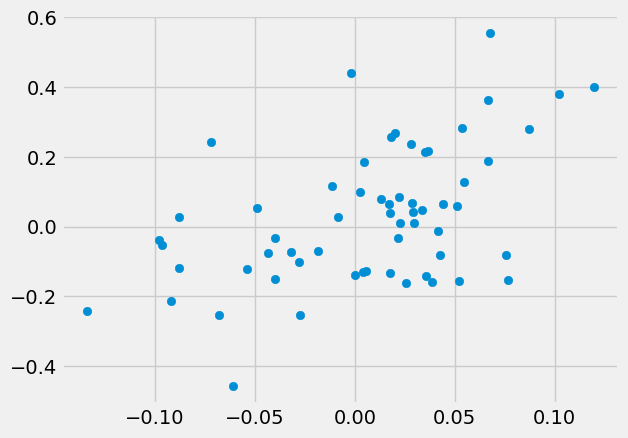

In [179]:
fig, ax =plt.subplots()
ax.scatter(X,Y)

In [ ]:
##CAPITAL ASSET PRICING MODEL(CAPM)

In [201]:
tickers=['IBM', 'F','AMZN','TSLA', '^GSPC']
start=dt.datetime(2017,12,1)
end=dt.datetime(2023,1,1)
CAPM=pdr.get_data_yahoo(tickers,start,end,interval='1mo')

[*********************100%***********************]  5 of 5 completed


In [202]:
CAPM.head()

Adj Close                                                \
                 AMZN         F         IBM       TSLA        ^GSPC   
Date                                                                  
2017-12-01  58.473499  9.738866  114.011940  20.756666  2673.610107   
2018-01-01  72.544502  8.553672  121.651375  23.620667  2823.810059   
2018-02-01  75.622498  8.476701  115.802856  22.870667  2713.830078   
2018-03-01  72.366997  8.852200  115.141953  17.742001  2640.870117   
2018-04-01  78.306503  8.980030  108.785629  19.593332  2648.050049   

                Close                                             ...  \
                 AMZN      F         IBM       TSLA        ^GSPC  ...   
Date                                                              ...   
2017-12-01  58.473499  12.49  146.673035  20.756666  2673.610107  ...   
2018-01-01  72.544502  10.97  156.500961  23.620667  2823.810059  ...   
2018-02-01  75.622498  10.61  148.977051  22.870667  2713.830078  ...   
2018-03-01  72.366997  11.08  146.682602  17.742001  2640.870117  ...   
2018-04-01  78.306503  11.24  138.585083  19.593332  2648.050049  ...   

                 Open                                                 Volume  \
                 AMZN      F         IBM       TSLA        ^GSPC        AMZN   
Date                                                                           
2017-12-01  58.602501  12.62  147.609940  20.362667  2645.100098  1155204000   
2018-01-01  58.599998  12.52  147.705551  20.799999  2683.729980  1927424000   
2018-02-01  72.250000  10.95  156.013382  23.400000  2816.449951  2755680000   
2018-03-01  75.680000  10.65  148.690247  23.000668  2715.219971  2608002000   
2018-04-01  70.880997  11.06  146.596558  17.084000  2633.449951  2598392000   

                                                            
                     F        IBM        TSLA        ^GSPC  
Date                                                        
2017-12-01   597327400   92872353  1648270500  65531700000  
2018-01-01  1142142300  151760375  1864072500  77318690000  
2018-02-01   970377300  107073687  1637850000  79933970000  
2018-03-01  1007233600   98655478  2359027500  76803890000  
2018-04-01   882033000  128391583  2854662000  70194700000  

[5 rows x 30 columns]

In [203]:
CAPM=CAPM['Adj Close']


In [204]:
log_returnscapm =np.log(CAPM/CAPM.shift())

In [205]:
log_returnscapm.head()

,AMZN,F,IBM,TSLA,^GSPC
Date,,,,,
2017-12-01,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.215627,-0.129764,0.064856,0.129255,0.054657
2018-02-01,0.041554,-0.009039,-0.049270,-0.032267,-0.039726
2018-03-01,-0.044003,0.043345,-0.005723,-0.253920,-0.027252
2018-04-01,0.078880,0.014337,-0.056786,0.099255,0.002715


In [206]:
###Calculating BETA
cov= log_returnscapm.cov()
var =log_returnscapm['^GSPC'].var()

In [207]:
beta1=cov.loc['TSLA', '^GSPC']/var

In [208]:
beta1

1.8393705593996488

In [209]:
cov

,AMZN,F,IBM,TSLA,^GSPC
AMZN,0.009532,0.003392,0.002272,0.009914,0.003524
F,0.003392,0.015524,0.002304,0.006854,0.004387
IBM,0.002272,0.002304,0.006109,0.000790,0.002529
TSLA,0.009914,0.006854,0.000790,0.038430,0.005404
^GSPC,0.003524,0.004387,0.002529,0.005404,0.002938


In [210]:
##Risk Free Return 
##Market Risk Premium ()
### 10 years or more(1.58)
risk_free_return= 0.0158
market_return = .105
expected_return_capm=risk_free_return + beta1*(market_return-risk_free_return)

In [211]:
expected_return_capm

0.17987185389844867

In [212]:
##Calculate if we assume that the free return is zero 
beta1*market_return


0.19313390873696312

In [213]:
## Calculate simultaneously
beta1=cov.loc['^GSPC']/var

In [214]:
beta1

AMZN     1.199315
F        1.493315
IBM      0.860716
TSLA     1.839371
^GSPC    1.000000
Name: ^GSPC, dtype: float64

In [215]:
market_return=risk_free_return + beta1*(market_return-risk_free_return)

In [216]:
market_return

AMZN     0.122779
F        0.149004
IBM      0.092576
TSLA     0.179872
^GSPC    0.105000
Name: ^GSPC, dtype: float64